<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/WeightInitializationNonZero_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [2]:
df=pd.read_csv('1.ushape.csv')
df.columns = ["X", "Y", "class"]
df = df.round(2)
df.head()


,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


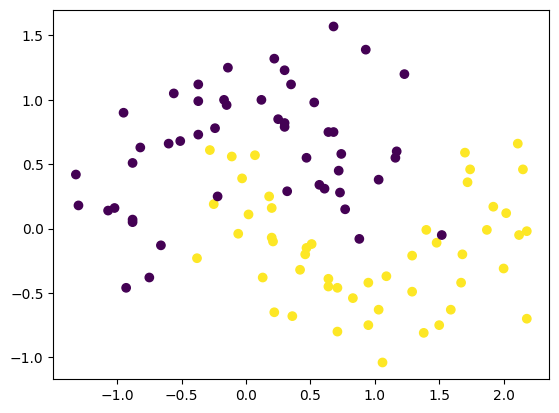

In [3]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [4]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [53]:
model=Sequential()


model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.get_weights()[0][0]

array([0.6574596 , 0.06682491], dtype=float32)

In [56]:
model.get_weights()[0].shape[0]
model.get_weights()[0].shape[1]

2

In [57]:
initial_weights = model.get_weights()

In [58]:
initial_weights

[array([[ 0.6574596 ,  0.06682491],
        [-0.77138734,  0.5499451 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.98754466, -0.15192044],
        [-0.10882068,  0.7431867 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1267633 ,  1.0036088 ],
        [ 0.52793074,  0.48354936]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.99890476,  0.4679004 ],
        [ 0.0699389 , -1.0140889 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.04992449],
        [0.706462  ]], dtype=float32),
 array([0.], dtype=float32)]

In [59]:
initial_weights[4]

array([[-1.1267633 ,  1.0036088 ],
       [ 0.52793074,  0.48354936]], dtype=float32)

In [60]:
initial_weights[0]=np.random.randn(initial_weights[0].shape[0],initial_weights[0].shape[1])
initial_weights[1]=np.zeros(initial_weights[1].shape)
initial_weights[2]=np.random.randn(initial_weights[2].shape[0],initial_weights[2].shape[1])
initial_weights[3]=np.zeros(initial_weights[3].shape)
initial_weights[4]=np.random.randn(initial_weights[4].shape[0],initial_weights[4].shape[1])
initial_weights[5]=np.zeros(initial_weights[5].shape)
initial_weights[6]=np.random.randn(initial_weights[6].shape[0],initial_weights[6].shape[1])
initial_weights[7]=np.zeros(initial_weights[7].shape)
initial_weights[8]=np.random.randn(initial_weights[8].shape[0],initial_weights[8].shape[1])
initial_weights[9]=np.zeros(initial_weights[9].shape)

In [61]:
initial_weights

[array([[-0.8330979 ,  0.93706295],
        [ 0.46198015, -0.65714861]]),
 array([0., 0.]),
 array([[ 1.41274196,  0.59278142],
        [ 0.56828124, -0.85734227]]),
 array([0., 0.]),
 array([[ 1.10511526, -1.53338419],
        [ 0.67706215, -0.68712934]]),
 array([0., 0.]),
 array([[-0.30748226,  0.61574374],
        [ 0.68821471,  0.02233339]]),
 array([0., 0.]),
 array([[0.99601864],
        [0.18790149]]),
 array([0.])]

In [62]:
model.set_weights(initial_weights)

In [63]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7319 - loss: 0.5925 - val_accuracy: 0.8500 - val_loss: 0.5218
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7201 - loss: 0.5944 - val_accuracy: 0.8500 - val_loss: 0.5202
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6850 - loss: 0.6107 - val_accuracy: 0.8500 - val_loss: 0.5188
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7279 - loss: 0.5894 - val_accuracy: 0.8500 - val_loss: 0.5173
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7084 - loss: 0.5955 - val_accuracy: 0.8500 - val_loss: 0.5159
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7060 - loss: 0.5936 - val_accuracy: 0.8500 - val_loss: 0.5144
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7099 - loss: 0.5886 - val_accuracy: 0.8500 - val_loss: 0.5131
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7138 - loss: 0.5805 - val_accuracy: 0.8500 - val_loss:

In [65]:
model.get_weights()

[array([[-0.5764582 ,  1.1979796 ],
        [ 0.7114567 , -0.38194743]], dtype=float32),
 array([ 0.07405039, -0.00989842], dtype=float32),
 array([[ 1.5245373 ,  0.60305727],
        [ 0.6784274 , -0.6801898 ]], dtype=float32),
 array([0.0509241 , 0.04931549], dtype=float32),
 array([[ 1.4396822, -1.8209449],
        [ 0.6537325, -0.631328 ]], dtype=float32),
 array([ 0.0509032 , -0.05679399], dtype=float32),
 array([[-0.55981517,  0.4784997 ],
        [ 0.94653696,  0.16118023]], dtype=float32),
 array([ 0.01415132, -0.00575552], dtype=float32),
 array([[ 1.2857546 ],
        [-0.04073634]], dtype=float32),
 array([0.06299749], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 710us/step


<Axes: >

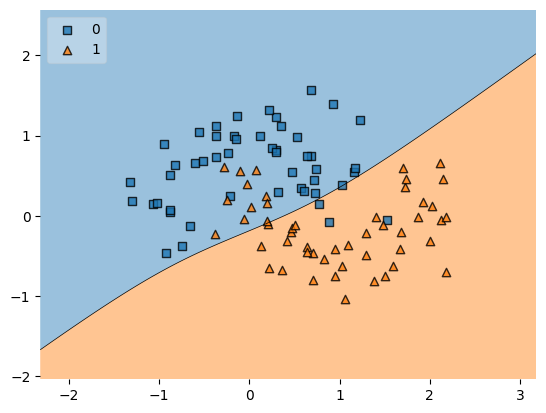

In [66]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)
